## Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R/Python and achieve the following goals:
• Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized
• Present the financial benefit of this project to the marketing team
Data
The data and the dictionary can be found here(https://archive.ics.uci.edu/ml/datasets/Bank+Marketing ). Please use the bank-additional-full.csv data set.

Please share your response here : https://goo.gl/forms/y7YZThccjkmBcK8F3

Warm Regards

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('bank-additional-full.csv',sep = ";")
data.describe()
#print(data)

#print(data[1])


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.shape[1]

21

In [6]:
len(data.shape)

2

In [7]:
data.shape[0]

41188

In [8]:
print(data[:5])

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

In [9]:
#print(data.columns.values.tolist)
data.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
print(data['y'])

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
41158    yes
41159    yes
41160    yes
41161     no
41162     no
41163    yes
41164    yes
41165    yes
41166    yes
41167     no
41168     no
41169     no
41170     no
41171    yes
41172    yes
41173    yes
41174    yes
41175     no
41176     no
41177     no
41178    yes
41179     no
41180     no
41181    yes
41182     no
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object


In [11]:
import numpy as np
response = data["y"]
#response.describe
#response.shape[0]
#for i in range(response.shape[0]):
 #      print(i)

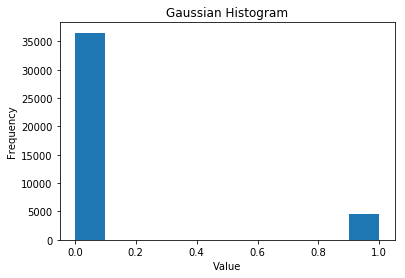

In [12]:
import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt
import numpy as np

def plot_yes_no(response):
    global binary
    binary = []
    for i in range(response.shape[0]):
       if(response[i] == "yes"): binary.append(1) 
       elif(response[i] == "no"): binary.append(0)
       else : print("Error")
    plt.hist(binary)
    plt.title("Gaussian Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

    #fig = plt.gcf()
    #plotly_fig = tls.mpl_to_plotly( fig )
    #py.iplot(plotly_fig, filename='mpl-basic-histogram')
    
plot_yes_no(response)

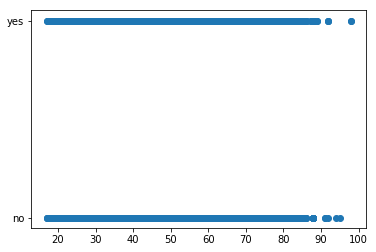

In [13]:
plt.scatter(data['age'], data['y'])
plt.show()

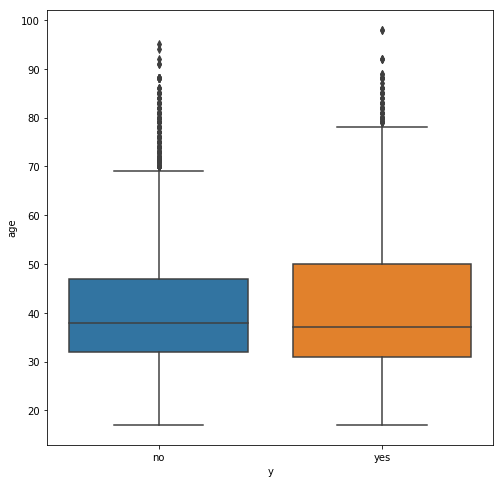

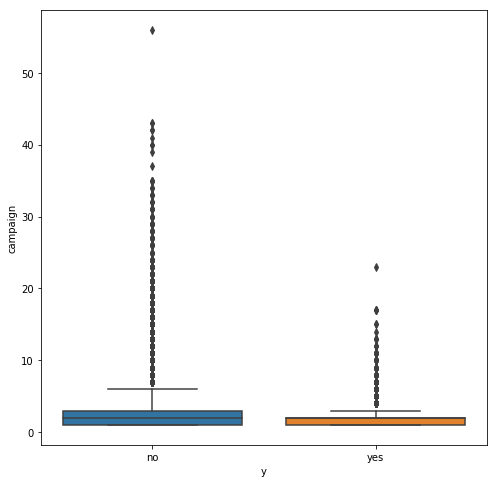

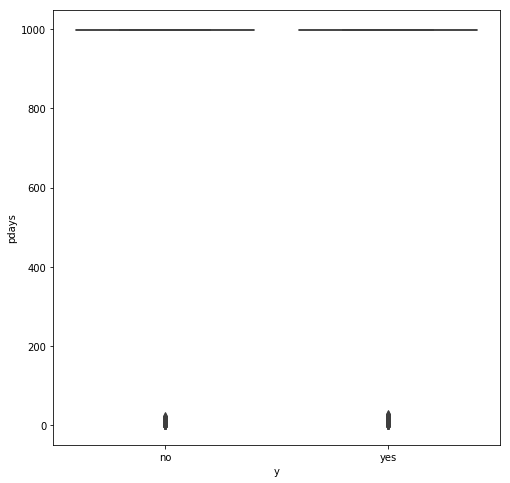

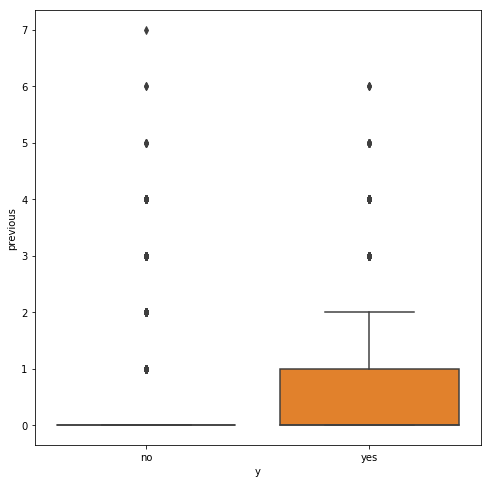

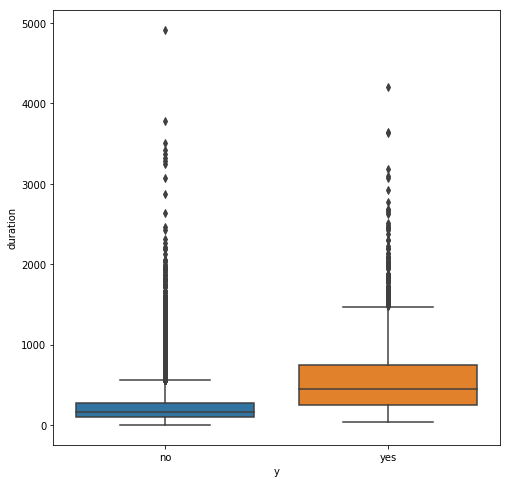

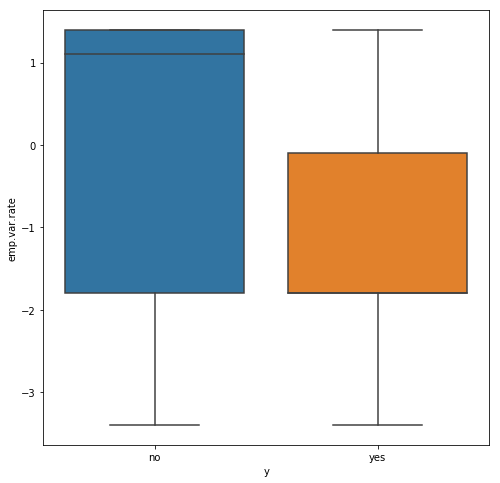

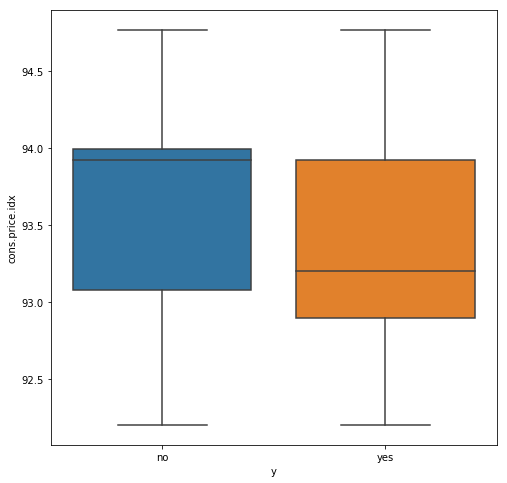

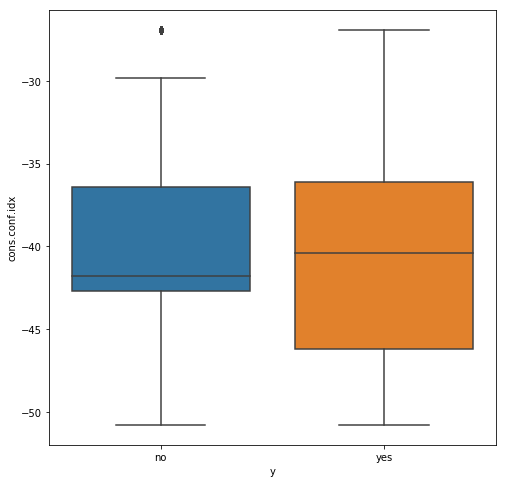

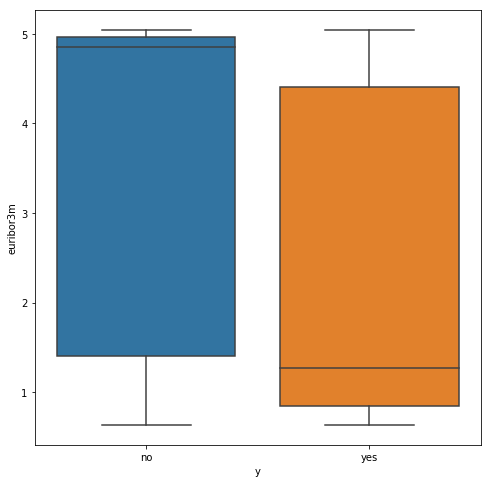

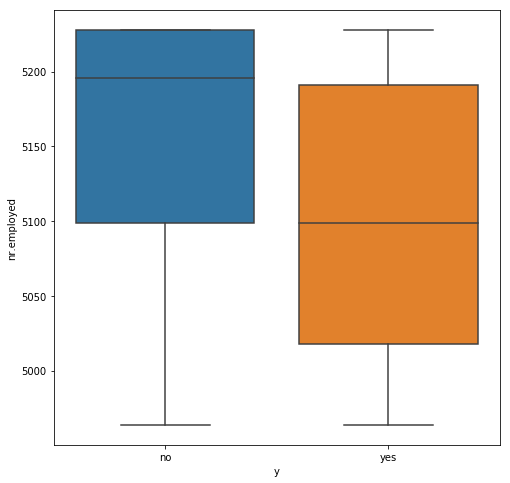

In [14]:
import seaborn as sns 
numeric_vars=["age", "campaign", "pdays", "previous", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical_vars=[i for i in data.columns if i not in numeric_vars]
categorical_vars.remove("y")
target="y"

for i in numeric_vars:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=target,y=i,data=data)
    plt.show()

In [15]:
data.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
duration = data["duration"]
print(duration)

0         261
1         149
2         226
3         151
4         307
5         198
6         139
7         217
8         380
9          50
10         55
11        222
12        137
13        293
14        146
15        174
16        312
17        440
18        353
19        195
20         38
21        262
22        342
23        181
24        172
25         99
26         93
27        233
28        255
29        362
         ... 
41158     363
41159     514
41160     843
41161     510
41162     347
41163     385
41164    1868
41165     403
41166     651
41167     236
41168     144
41169     154
41170     293
41171     112
41172     353
41173     329
41174     208
41175     180
41176     360
41177     124
41178     483
41179     151
41180     254
41181     281
41182     112
41183     334
41184     383
41185     189
41186     442
41187     239
Name: duration, Length: 41188, dtype: int64


In [17]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
data_dict = data.T.to_dict().values()

In [18]:
vec = DictVectorizer()
signal_array = vec.fit_transform(data_dict).toarray()
feature_names = vec.get_feature_names()
df = pd.DataFrame(signal_array,columns=feature_names)
df.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


Feature ranking:
1. feature age (0.164047)
2. feature emp.var.rate (0.117021)
3. feature campaign (0.083560)
4. feature month=sep (0.049478)
5. feature nr.employed (0.034052)
6. feature cons.conf.idx (0.027570)
7. feature cons.price.idx (0.023012)
8. feature poutcome=nonexistent (0.022943)
9. feature education=unknown (0.022474)
10. feature euribor3m (0.021194)
11. feature housing=unknown (0.021185)
12. feature housing=yes (0.017653)
13. feature marital=divorced (0.016720)
14. feature education=basic.9y (0.016283)
15. feature education=professional.course (0.016191)
16. feature marital=married (0.014782)
17. feature day_of_week=mon (0.014618)
18. feature day_of_week=wed (0.014473)
19. feature poutcome=success (0.014427)
20. feature day_of_week=thu (0.014243)
21. feature day_of_week=tue (0.014166)
22. feature job=student (0.014008)
23. feature job=unknown (0.014003)
24. feature loan=unknown (0.013831)
25. feature day_of_week=fri (0.013753)
26. feature education=illiterate (0.011851)
27.

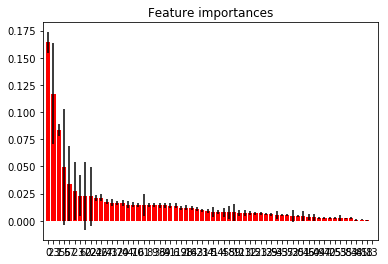

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X = signal_array[:,:-2]
X = np.hstack((X[:,:14],X[:,15:]))
y = signal_array[:,-1]
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Using feature importance we can see that below are the top 3 most important features. 
1. feature age (0.164047)
2. feature emp.var.rate (0.117021)
3. feature campaign (0.083560)

# Conversion vs Feature
Now we will plot various features vs if the customer took the policy

In [21]:
#list of columns we have
print(feature_names)

['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'contact=cellular', 'contact=telephone', 'day_of_week=fri', 'day_of_week=mon', 'day_of_week=thu', 'day_of_week=tue', 'day_of_week=wed', 'default=no', 'default=unknown', 'default=yes', 'duration', 'education=basic.4y', 'education=basic.6y', 'education=basic.9y', 'education=high.school', 'education=illiterate', 'education=professional.course', 'education=university.degree', 'education=unknown', 'emp.var.rate', 'euribor3m', 'housing=no', 'housing=unknown', 'housing=yes', 'job=admin.', 'job=blue-collar', 'job=entrepreneur', 'job=housemaid', 'job=management', 'job=retired', 'job=self-employed', 'job=services', 'job=student', 'job=technician', 'job=unemployed', 'job=unknown', 'loan=no', 'loan=unknown', 'loan=yes', 'marital=divorced', 'marital=married', 'marital=single', 'marital=unknown', 'month=apr', 'month=aug', 'month=dec', 'month=jul', 'month=jun', 'month=mar', 'month=may', 'month=nov', 'month=oct', 'month=sep', 'nr.employed', 'pdays

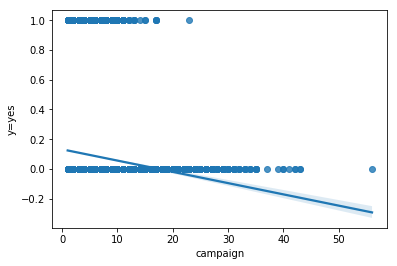

In [23]:
ax = sns.regplot(x="campaign", y="y=yes", order=1, data=df, truncate=True)

ax = sns.regplot(x="emp.var.rate", y="y=yes", order=1, data=df, truncate=True)

C:\Users\SubhamM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



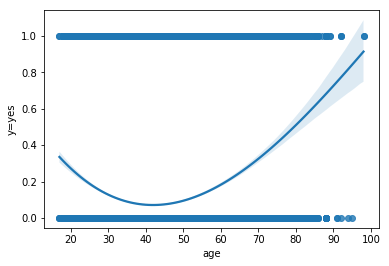

In [22]:
ax = sns.regplot(x="age", y="y=yes", order=3, data=df, truncate=True)

## Observations:
    1. After 20 times campaign the converstion is almost zero so we can stop calling after 20 times. If there is any requirement
       to further reduce the marketing cost we can stop calling after 15 times as there are very few conversion after it. Here
       i am dropping campaign after 20.
    2. 

In [25]:
# Total Conversion ratio
np.sum(df['y=yes'])/np.sum(df['campaign'])

0.043875408967982296

In [27]:
# Now let's see efficiancy on every additional call
print("Nth Call \t Efficiency")
for i in range(1,30):
    goo = np.sum(df.loc[df['campaign']==i]['y=yes']) / float(df.loc[df['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(goo))

Nth Call 	 Efficiency
1 		 0.05584150723511702
2 		 0.05143124097511254
3 		 0.04423551171393342
4 		 0.03261296660117878
5 		 0.024077046548956663
6 		 0.022156573116691284
7 		 0.015793848711554447
8 		 0.009566685424873381
9 		 0.012345679012345678
10 		 0.010968921389396709
11 		 0.01380897583429229
12 		 0.004335260115606936
13 		 0.007054673721340388
14 		 0.002105263157894737
15 		 0.0049261083743842365
16 		 0.0
17 		 0.013157894736842105
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.008620689655172414
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [28]:
print(data["nr.employed"])

0        5191.0
1        5191.0
2        5191.0
3        5191.0
4        5191.0
5        5191.0
6        5191.0
7        5191.0
8        5191.0
9        5191.0
10       5191.0
11       5191.0
12       5191.0
13       5191.0
14       5191.0
15       5191.0
16       5191.0
17       5191.0
18       5191.0
19       5191.0
20       5191.0
21       5191.0
22       5191.0
23       5191.0
24       5191.0
25       5191.0
26       5191.0
27       5191.0
28       5191.0
29       5191.0
          ...  
41158    4963.6
41159    4963.6
41160    4963.6
41161    4963.6
41162    4963.6
41163    4963.6
41164    4963.6
41165    4963.6
41166    4963.6
41167    4963.6
41168    4963.6
41169    4963.6
41170    4963.6
41171    4963.6
41172    4963.6
41173    4963.6
41174    4963.6
41175    4963.6
41176    4963.6
41177    4963.6
41178    4963.6
41179    4963.6
41180    4963.6
41181    4963.6
41182    4963.6
41183    4963.6
41184    4963.6
41185    4963.6
41186    4963.6
41187    4963.6
Name: nr.employed, Lengt

In nr.employed  we didn'find thing to optimize.

## Finding patterns in Age

We have divided the age into 10 groups and compared their efficiency in Nth call.

In [30]:
print("For age upto 30")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))
#till 7th call

For age upto 30
Nth Call 	 Efficiency
1 		 0.07502708559046588
2 		 0.07100309745055992
3 		 0.06274509803921569
4 		 0.04447739065974796
5 		 0.03882352941176471
6 		 0.02058319039451115
7 		 0.030805687203791468
8 		 0.006493506493506494
9 		 0.012875536480686695
10 		 0.005376344086021506
11 		 0.013888888888888888
12 		 0.0
13 		 0.010869565217391304
14 		 0.0
15 		 0.014705882352941176
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [32]:
print("For age between 30-40")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 30-40
Nth Call 	 Efficiency
1 		 0.04882216526302942
2 		 0.042643923240938165
3 		 0.04005444293214078
4 		 0.028093645484949834
5 		 0.02048131080389145
6 		 0.024279210925644917
7 		 0.007494646680942184
8 		 0.008746355685131196
9 		 0.011538461538461539
10 		 0.011990407673860911
11 		 0.015015015015015015
12 		 0.0076045627376425855
13 		 0.009523809523809525
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.009259259259259259
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.02040816326530612
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [33]:
print("For age between 40-50")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 40-50
Nth Call 	 Efficiency
1 		 0.03925397910360316
2 		 0.036345108695652176
3 		 0.03047676523838262
4 		 0.027820710973724884
5 		 0.020737327188940093
6 		 0.016853932584269662
7 		 0.008012820512820512
8 		 0.008368200836820083
9 		 0.005333333333333333
10 		 0.013888888888888888
11 		 0.017316017316017316
12 		 0.005434782608695652
13 		 0.006622516556291391
14 		 0.007936507936507936
15 		 0.0
16 		 0.0
17 		 0.023529411764705882
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [34]:
print("For age between 50-60")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))
#till 9th call

For age between 50-60
Nth Call 	 Efficiency
1 		 0.050709615691277306
2 		 0.05120481927710843
3 		 0.040806293018682396
4 		 0.024681528662420384
5 		 0.016766467065868262
6 		 0.02120141342756184
7 		 0.022004889975550123
8 		 0.013559322033898305
9 		 0.024489795918367346
10 		 0.009900990099009901
11 		 0.0
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.011363636363636364
16 		 0.0
17 		 0.016129032258064516
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [ ]:
print("For age above 60")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] > 60) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = float(df[(df['age'] > 60) & (df['campaign'] >= i)].shape[0])+1
    print (str((i))+" \t\t "+str(num/den))

There is no extreme pattern observed in age wise conversion upto Nth call. If required we can call till 9th and 7th time 
for age group 50-60 and upto 30 age.

In [36]:
# Calculate how many calls were made in total
total_calls = np.sum(df['campaign'])
print(total_calls)

105754.0


In [37]:
# Calculate how many calls were made after the 6th call
extra_calls = np.sum(df[df['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0]
print(extra_calls)

12040.0


In [38]:
# Calculate reduction in marketing cost
reduction = ( extra_calls *100 ) / total_calls
print(reduction)

11.384912154622993


In [40]:
total_sales=np.float(df[df['y=yes']==1].shape[0])
print(total_sales)

4640.0


In [41]:
less_costly_sales=np.float(df[(df['campaign'] <= 6) & (df['y=yes']==1)].shape[0])
print(less_costly_sales)

4529.0


In [42]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

97.60775862068965


Now suppose we can call till 9th and 7th time for age group 50-60 and upto 30 age.

In [ ]:
# Calculate how many calls were made after the 6th call
extra_calls = np.sum(df[df['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0]
print(extra_calls)